<a href="https://colab.research.google.com/github/Saniyab2004/Atmeml/blob/main/car_mileage_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [5]:
df = pd.read_csv('/content/Car Data India.csv')

In [6]:
print('Shape:', df.shape)
print(df.info())
print(df.describe())

Shape: (10000, 19)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Car_ID               10000 non-null  int64  
 1   Brand                9997 non-null   object 
 2   Model                9997 non-null   object 
 3   Year                 9995 non-null   float64
 4   Fuel_Type            9994 non-null   object 
 5   Transmission         9994 non-null   object 
 6   Price                9992 non-null   float64
 7   Mileage              9995 non-null   float64
 8   Engine_CC            9993 non-null   float64
 9   Seating_Capacity     9999 non-null   float64
 10  Service_Cost         9996 non-null   float64
 11  Color                10000 non-null  object 
 12  Owner_Type           10000 non-null  object 
 13  State                9998 non-null   object 
 14  Insurance_Status     9996 non-null   object 
 15  Manufacturing_Plan

In [7]:
print("Missing values:\n", df.isnull().sum())

Missing values:
 Car_ID                 0
Brand                  3
Model                  3
Year                   5
Fuel_Type              6
Transmission           6
Price                  8
Mileage                5
Engine_CC              7
Seating_Capacity       1
Service_Cost           4
Color                  0
Owner_Type             0
State                  2
Insurance_Status       4
Manufacturing_Plant    1
Number_of_Repairs      2
Previous_Accidents     0
Body_Type              1
dtype: int64


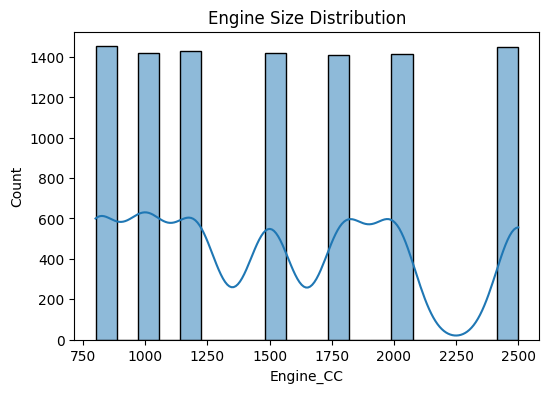

In [8]:
plt.figure(figsize=(6,4))
sns.histplot(df['Engine_CC'], bins=20, kde=True)
plt.title('Engine Size Distribution')
plt.show()

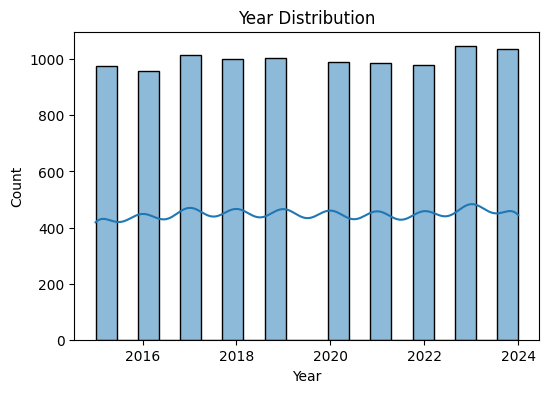

In [9]:
plt.figure(figsize=(6,4))
sns.histplot(df['Year'], bins=20, kde=True)
plt.title('Year Distribution')
plt.show()

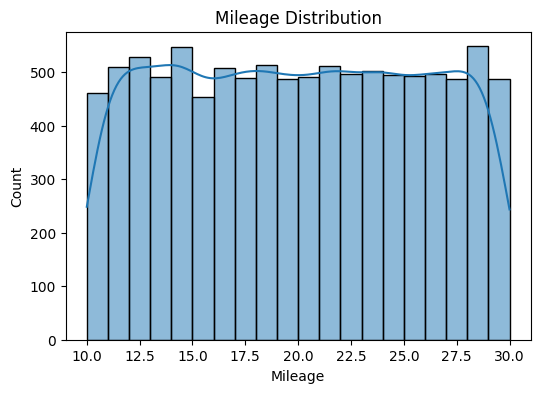

In [10]:
plt.figure(figsize=(6,4))
sns.histplot(df['Mileage'], bins=20, kde=True)
plt.title('Mileage Distribution')
plt.show()

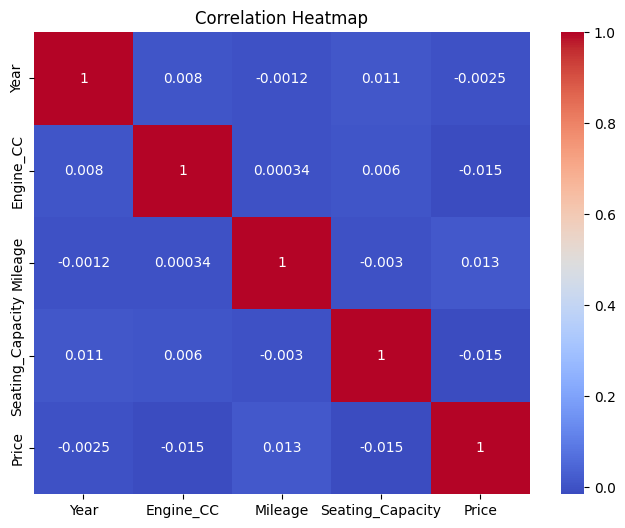

In [11]:
numeric_cols = ['Year','Engine_CC','Mileage','Seating_Capacity','Price']
corr = df[numeric_cols].corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [12]:
df['Approx_Weight'] = df['Engine_CC'] * df['Seating_Capacity'] * 0.5

In [13]:
X = df[['Engine_CC','Year','Approx_Weight']]
y = df['Mileage']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X_train_scaled = imputer.fit_transform(X_train_scaled)
X_test_scaled = imputer.transform(X_test_scaled)

In [20]:
imputer_y = SimpleImputer(strategy='mean')  # or 'median'
y_train_imputed = imputer_y.fit_transform(y_train.values.reshape(-1, 1)).ravel()

lr = LinearRegression()
lr.fit(X_train_scaled, y_train_imputed)
y_pred_lr = lr.predict(X_test_scaled)

In [22]:
from sklearn.impute import SimpleImputer

imputer_y_test = SimpleImputer(strategy='mean')
y_test_imputed = imputer_y_test.fit_transform(y_test.values.reshape(-1, 1)).ravel()

print('Linear Regression:')
print('R2:', r2_score(y_test_imputed, y_pred_lr))
print('MAE:', mean_absolute_error(y_test_imputed, y_pred_lr))
print('RMSE:', np.sqrt(mean_squared_error(y_test_imputed, y_pred_lr)))

Linear Regression:
R2: -0.0012260177839151787
MAE: 5.076159598069493
RMSE: 5.8462154334472896


In [23]:
ridge = Ridge()
lasso = Lasso()

In [24]:
params = {'alpha':[0.01,0.1,1,10,100]}

In [26]:
from sklearn.impute import SimpleImputer

imputer_y_train = SimpleImputer(strategy='mean')
y_train_imputed = imputer_y_train.fit_transform(y_train.values.reshape(-1, 1)).ravel()

ridge_cv = GridSearchCV(ridge, params, scoring='r2', cv=5)
ridge_cv.fit(X_train_scaled, y_train_imputed)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [28]:
lasso_cv = GridSearchCV(lasso, params, scoring='r2', cv=5)
lasso_cv.fit(X_train_scaled, y_train_imputed)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100]}, scoring='r2')

In [29]:
print('Best Ridge alpha:', ridge_cv.best_params_, 'Score:', ridge_cv.best_score_)
print('Best Lasso alpha:', lasso_cv.best_params_, 'Score:', lasso_cv.best_score_)

Best Ridge alpha: {'alpha': 100} Score: -0.0011916670442446708
Best Lasso alpha: {'alpha': 1} Score: -0.00019794264523183004


In [31]:
y_pred_ridge = ridge_cv.best_estimator_.predict(X_test_scaled)
y_pred_lasso = lasso_cv.best_estimator_.predict(X_test_scaled)

In [33]:
print('Ridge R2:', r2_score(y_test_imputed, y_pred_ridge))
print('Lasso R2:', r2_score(y_test_imputed, y_pred_lasso))

Ridge R2: -0.001212012183881006
Lasso R2: -0.00014975223402147186


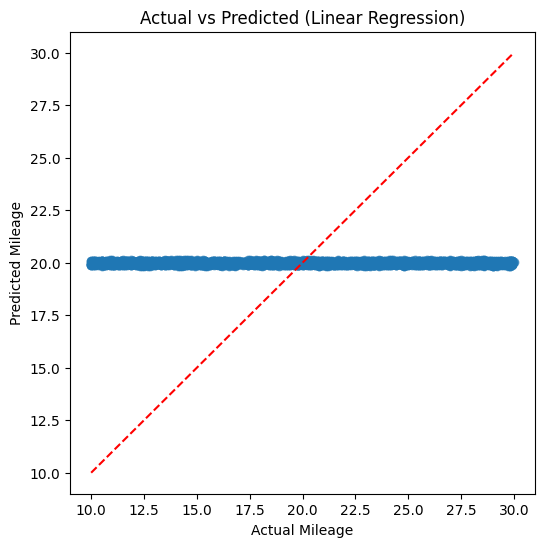

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_lr, alpha=0.7)
plt.xlabel('Actual Mileage')
plt.ylabel('Predicted Mileage')
plt.title('Actual vs Predicted (Linear Regression)')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

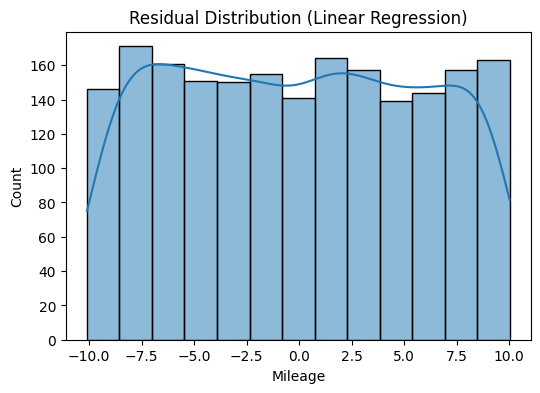

In [35]:
residuals = y_test - y_pred_lr
plt.figure(figsize=(6,4))
sns.histplot(residuals, kde=True)
plt.title('Residual Distribution (Linear Regression)')
plt.show()

In [37]:

example = np.array([[2000, 2020, 5]])


example_df = pd.DataFrame(example, columns=['Engine_CC', 'Year', 'Seating_Capacity'])
example_df['Approx_Weight'] = example_df['Engine_CC'] * example_df['Seating_Capacity'] * 0.5


example_features = example_df[['Engine_CC', 'Year', 'Approx_Weight']]


example_scaled = scaler.transform(example_features)


predicted_mileage = lr.predict(example_scaled)
print('Predicted Mileage for example car:', predicted_mileage[0])

Predicted Mileage for example car: 19.964212024136636
